In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!kaggle datasets download -d humairmunir/anaemia-prediction

Dataset URL: https://www.kaggle.com/datasets/humairmunir/anaemia-prediction
License(s): apache-2.0
  0% 0.00/1.85k [00:00<?, ?B/s]
100% 1.85k/1.85k [00:00<00:00, 3.94MB/s]


In [ ]:
!unzip /content/anaemia-prediction.zip

Archive:  /content/anaemia-prediction.zip
  inflating: output.csv              


In [ ]:
df =pd.read_csv('/content/output.csv')

In [ ]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,M,43.2555,30.8421,25.9025,6.3,Yes
1,2,F,45.6033,28.1900,26.2067,13.5,No
2,3,F,45.0107,28.9677,26.0215,11.7,No
3,4,F,44.5398,28.9899,26.4703,13.5,No
4,5,M,43.2870,30.6972,26.0158,12.4,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Sex           104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 5.8+ KB


In [ ]:
df.shape

(104, 7)

In [ ]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb
count,104.000000,104.000000,104.000000,104.000000,104.000000
mean,52.500000,45.654175,28.875507,25.470325,12.150962
std,30.166206,2.816294,1.554275,1.984671,2.512957
min,1.000000,38.796800,25.140300,19.541300,2.800000
25%,26.750000,43.911375,27.871300,24.896425,10.650000
50%,52.500000,45.385350,28.948750,25.953200,12.600000
75%,78.250000,46.968325,29.887275,26.721600,14.000000
max,104.000000,54.647800,32.368100,29.841400,16.300000


In [ ]:
df.isna().sum()

,0
Number,0
Sex,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Hb,0
Anaemic,0


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,29
M,26
F,26
F,23


In [ ]:
df['Sex'].unique()
df['Sex'] = df['Sex'].replace({'M ':'M' ,'F ':'F'})

In [ ]:
df['Sex'].value_counts()

,count
Sex,
M,55
F,49


In [ ]:
df['Sex'] = df['Sex'].map({'M': 0, 'F': 1})

<Axes: xlabel='count', ylabel='Sex'>

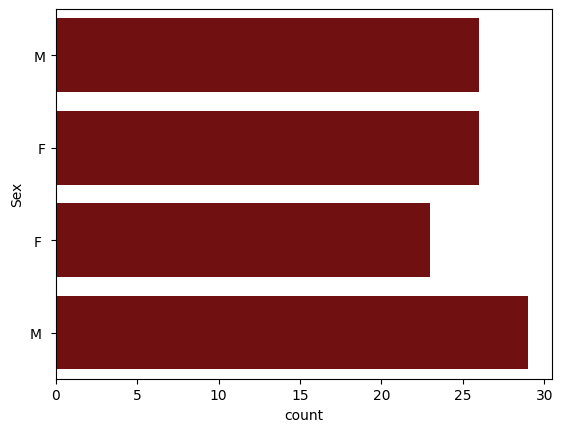

In [ ]:
sns.countplot(df['Sex'], color='maroon')

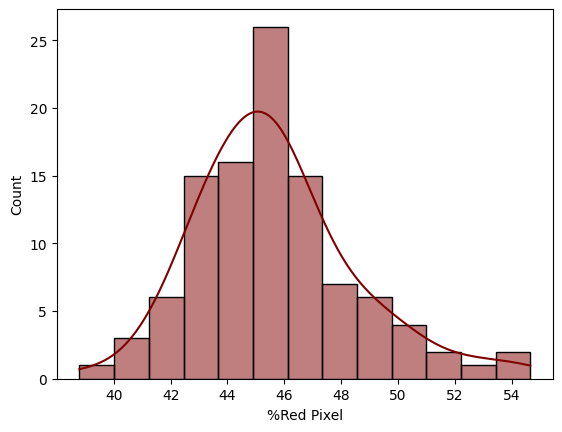

In [ ]:
sns.histplot(df['%Red Pixel'] , color='maroon' ,kde=True)
plt.show()

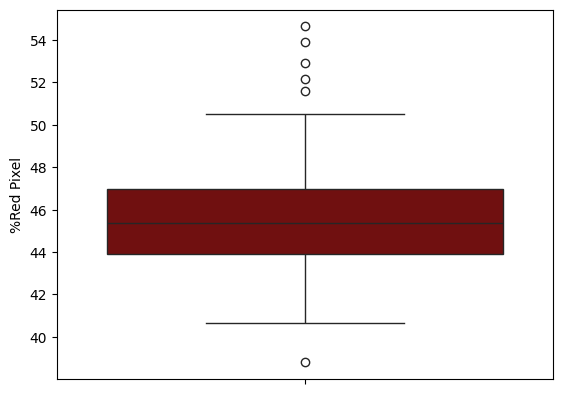

In [ ]:
sns.boxplot(df['%Red Pixel'] , color='maroon')
plt.show()

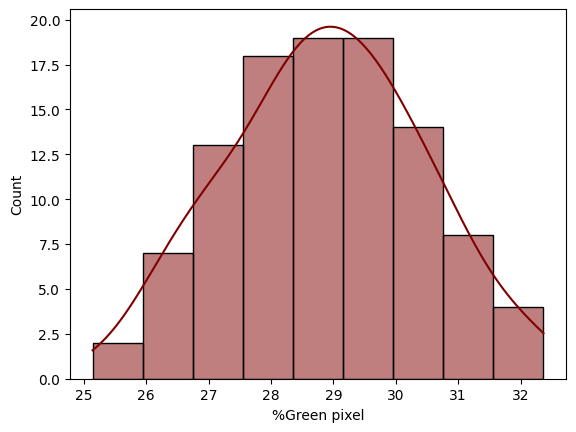

In [ ]:
sns.histplot(df['%Green pixel'] , color='maroon' ,kde=True)
plt.show()

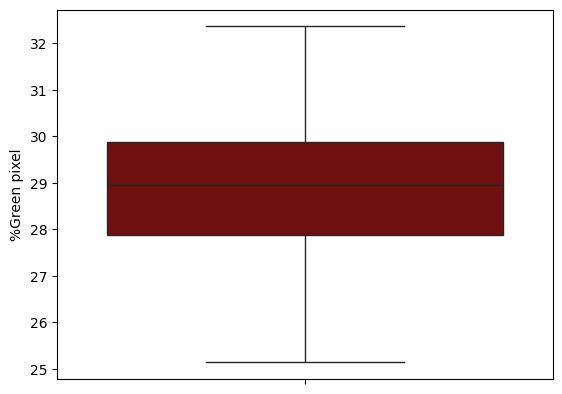

In [ ]:
sns.boxplot(df['%Green pixel'] , color='maroon')
plt.show()

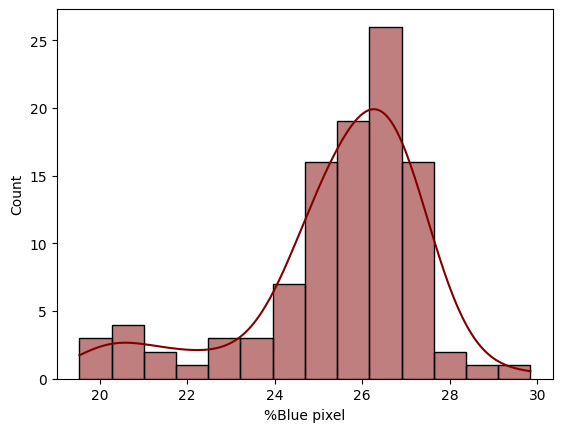

In [ ]:
sns.histplot(df['%Blue pixel'] , color='maroon' ,kde=True)
plt.show()

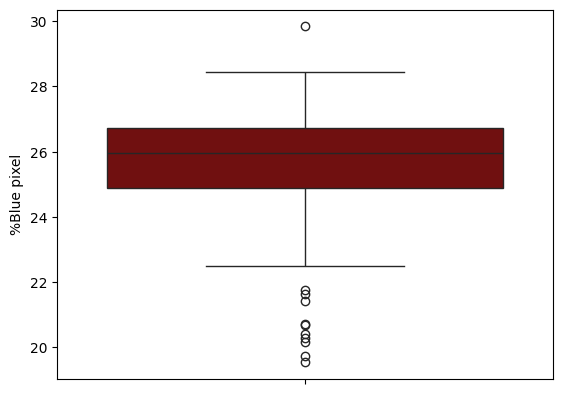

In [ ]:
sns.boxplot(df['%Blue pixel'] , color='maroon')
plt.show()

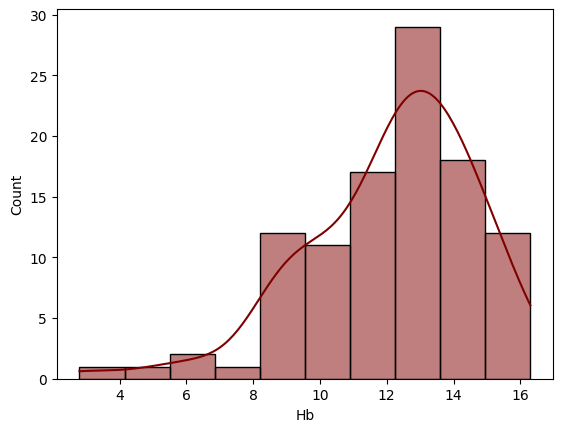

In [ ]:
sns.histplot(df['Hb'] , color='maroon' ,kde=True)
plt.show()

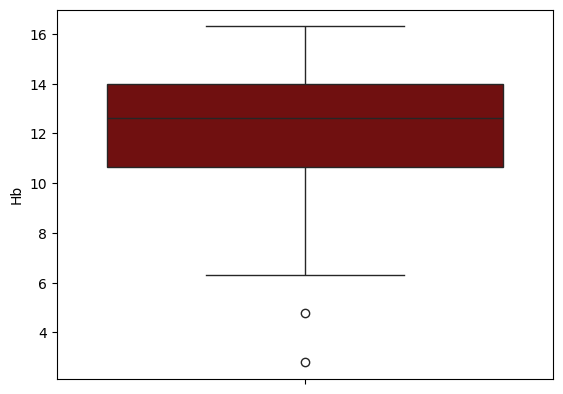

In [ ]:
sns.boxplot(df['Hb'] , color='maroon')
plt.show()

In [ ]:
Q1_B = df['%Blue pixel'].quantile(0.25)
Q3_B = df['%Blue pixel'].quantile(0.75)
IQR_B = Q3_B - Q1_B
df['%Blue pixel'][df['%Blue pixel']> Q1_B+1.5*IQR_B] =  Q3_B
df['%Blue pixel'][df['%Blue pixel']< Q1_B-1.5*IQR_B] =  Q1_B

<ipython-input-81-338ba7d5c8c9>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%Blue pixel'][df['%Blue pixel']> Q1_B+1.5*IQR_B] =  Q3_B
<ipython-input-81-338ba7d5c8c9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%Blue pixel'][df['%Blue pixel']< Q1_B-1.5*IQR_B] =  Q1_B


In [ ]:
Q1_R = df['%Red Pixel'].quantile(0.25)
Q3_R = df['%Red Pixel'].quantile(0.75)
IQR_R = Q3_R - Q1_R
df['%Red Pixel'][df['%Red Pixel']> Q1_R+1.5*IQR_R] =  Q3_R
df['%Red Pixel'][df['%Red Pixel']< Q1_R-1.5*IQR_R] =  Q1_R

<ipython-input-82-e00b10da5010>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%Red Pixel'][df['%Red Pixel']> Q1_R+1.5*IQR_R] =  Q3_R
<ipython-input-82-e00b10da5010>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['%Red Pixel'][df['%Red Pixel']< Q1_R-1.5*IQR_R] =  Q1_R


In [ ]:
df.head()

,Number,Sex,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,0,43.2555,30.8421,25.9025,6.3,Yes
1,2,1,45.6033,28.1900,26.2067,13.5,No
2,3,1,45.0107,28.9677,26.0215,11.7,No
3,4,1,44.5398,28.9899,26.4703,13.5,No
4,5,0,43.2870,30.6972,26.0158,12.4,No


In [ ]:
from sklearn.preprocessing import LabelEncoder ,StandardScaler

In [ ]:
lb = LabelEncoder()

In [ ]:
df['Anaemic']=lb.fit_transform(df['Anaemic'])

<Axes: >

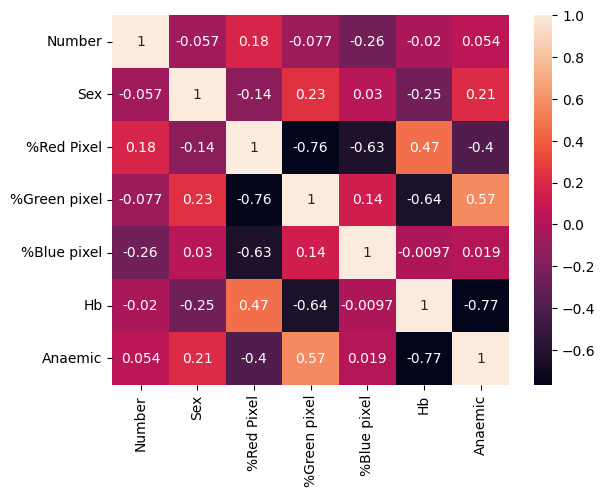

In [ ]:
sns.heatmap(df.corr() , annot=True)

In [ ]:
X = df.drop(columns='Anaemic')
y = df['Anaemic']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,y , test_size=0.2 , random_state=42)

In [ ]:
sc= StandardScaler()

In [ ]:
X_tain_scal = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT=DecisionTreeClassifier()

In [ ]:
DT.fit(X_tain_scal , y_train)

DecisionTreeClassifier()

In [ ]:
DT.score(X_tain_scal , y_train)

1.0

In [ ]:
DT.score(X_test_scaled,y_test )

1.0

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = DT.predict(X_test_scaled)

In [ ]:
print(classification_report( y_pred , y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00         5

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21

